## Small-scale grayscale image denoising autoencoder

 - Here, I have trained a denoising autoencoder for noise removal from the MNIST Handwritten digit dataset.
 - It is quite efficient in noise removal if the image size is 28*28.


## Code follows

In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

11501568/11490434 [==============================] - 0s 0us/step


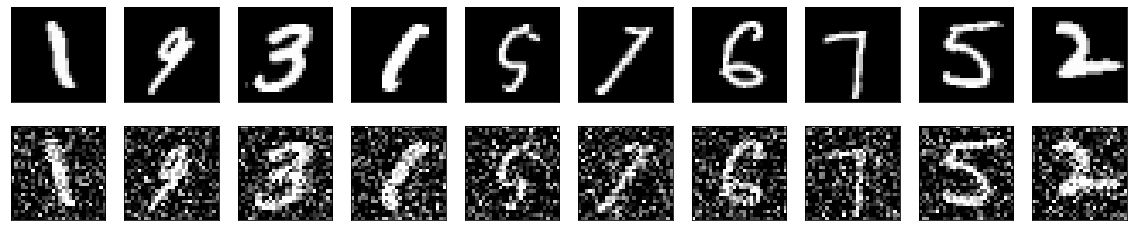

In [44]:
(train_data, _), (test_data, _) = mnist.load_data()

train_data = preprocess(train_data)
test_data = preprocess(test_data)

noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

display(train_data, noisy_train_data)

In [51]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 32)        9248

In [52]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 9s 16ms/step - loss: 0.1374 - val_loss: 0.0728
Epoch 2/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0712 - val_loss: 0.0693
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0690 - val_loss: 0.0678
Epoch 4/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0679 - val_loss: 0.0670
Epoch 5/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0672 - val_loss: 0.0665
Epoch 6/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 7/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0663 - val_loss: 0.0657
Epoch 8/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0659 - val_loss: 0.0653
Epoch 9/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0656 - val_loss: 0.0651
Epoch 10/50
469/469 [==============================] - 7s 15ms/step - loss: 0.0653 - val_lo

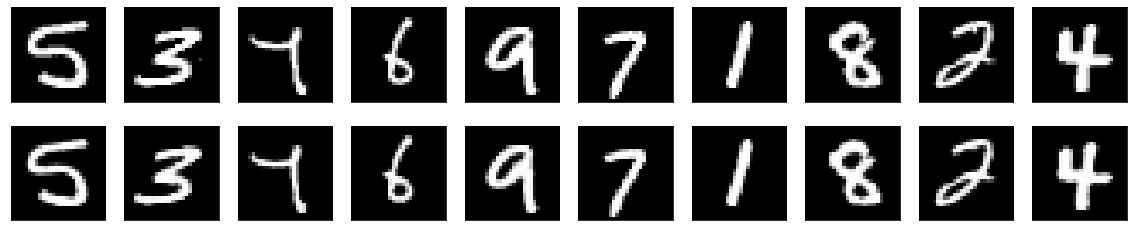

In [53]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [54]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1013 - val_loss: 0.0938
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0934 - val_loss: 0.0917
Epoch 3/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0919 - val_loss: 0.0906
Epoch 4/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0909 - val_loss: 0.0899
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0902 - val_loss: 0.0891
Epoch 6/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0896 - val_loss: 0.0886
Epoch 7/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0891 - val_loss: 0.0882
Epoch 8/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0887 - val_loss: 0.0878
Epoch 9/100
469/469 [==============================] - 7s 15ms/step - loss: 0.0883 - val_loss: 0.0875
Epoch 10/100
469/469 [==============================] - 7s 15ms/step - loss: 0.088

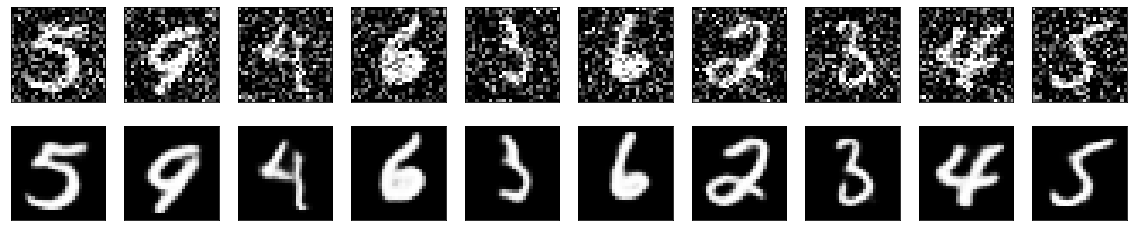

In [55]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)